In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
sns.set_style("whitegrid")

## Scenario C

In [93]:
# read the Scenario_C.xlsx file into a pandas DataFrame, the first tab is 'HH', second is 'HA', the third is 'AH', and teh fourth is 'AA'
df_hh = pd.read_excel('Scenario_C.xlsx', sheet_name='HH')
df_ha = pd.read_excel('Scenario_C.xlsx', sheet_name='HA')
df_ah = pd.read_excel('Scenario_C.xlsx', sheet_name='AH')
df_aa = pd.read_excel('Scenario_C.xlsx', sheet_name='AA')

In [94]:
# combine the four dataframes into one, adding a new column 'Configuration' to indicate the configuration
df_hh['Configuration'] = 'HH'
df_ha['Configuration'] = 'HA'
df_ah['Configuration'] = 'AH'
df_aa['Configuration'] = 'AA'
df = pd.concat([df_hh, df_ha, df_ah, df_aa], ignore_index=True)

In [95]:
# in df, rename the the pilots to be the following: 'Jacob': Pilot 1, 'Chan': Pilot 2, 'Grimmer': Pilot 3, 'Schnell': Pilot 4, 'McIntyre': Pilot 5, 'Smith': Pilot 6, 'Fleischmann': Pilot 7
df['Lead_Pilot'] = df['Lead_Pilot'].replace({'Jacob': 'Pilot 1', 'Chan': 'Pilot 2', 'Grimmer': 'Pilot 3', 'Schnell': 'Pilot 4', 'McIntyre': 'Pilot 5', 'Fleischmann': 'Pilot 6', 'Smith': 'Pilot 7'})

In [96]:
# get the average 'CM{i}_MOP_Time_to_Intercept_s' for i = 1, ..., 5 and add to a new column 'Avg_Time_to_Intercept_s'
df['Avg_Time_to_Intercept_s'] = df[[f'CM{i}_MOP_Time_to_Intercept_s' for i in range(1, 6)]].mean(axis=1)
df['Avg_Time_to_Consent_s'] = df[[f'CM{i}_MOP_Time_to_Consent_s' for i in range(1, 6)]].mean(axis=1)
df['Avg_Airspeed_Diff_at_Intercept_kt'] = df[[f'CM{i}_Airspeed_Diff_at_Intercept_kt' for i in range(1, 6)]].mean(axis=1)
df['Avg_Heading_Diff_at_Intercept_deg'] = df[[f'CM{i}_Heading_Diff_at_Intercept_deg' for i in range(1, 6)]].mean(axis=1)
df['Avg_Altitude_Offset_at_Intercept_ft'] = df[[f'CM{i}_Altitude_Offset_at_Intercept_ft' for i in range(1, 6)]].mean(axis=1)
df['Avg_Distance_from_CM_at_Intercept_nm'] = df[[f'CM{i}_Distance_from_CM_at_Intercept_nm' for i in range(1, 6)]].mean(axis=1)
df['Avg_Aspect_at_MELD_Range_deg'] = df[[f'CM{i}_Aspect_at_MELD_Range_deg' for i in range(1, 6)]].mean(axis=1)
df['Proportion_Intercepted_by_Lead'] = df[[f'CM{i}_Interceptor Role' for i in range(1, 6)]].apply(lambda x: sum(x == 'Lead') / len(x), axis=1)
df['Correct_Acquisition'] = df['Correct_Sort'].apply(lambda x: 1 if x == 'Y' else 0)
df['Avg_Heading_Diff_at_Intercept_deg'] = df['Avg_Heading_Diff_at_Intercept_deg'].abs()
df.loc[df['Avg_Airspeed_Diff_at_Intercept_kt'] < 0, 'Avg_Airspeed_Diff_at_Intercept_kt'] = np.nan


In [97]:
mop_list = ['Proportion_SAMs_Identified', 'Avg_SAM_ID_Time_s', 'Lead_Altitude_Deviation_Count', 'Wingman_Altitude_Deviation_Count',
            'Lead_Altitude_Deviation_Integrated_ft_s', 'Wingman_Altitude_Deviation_Integrated_ft_s', 'Proportion_CMs_Intercepted',
            'Avg_Time_to_Intercept_s', 'Avg_Time_to_Consent_s', 'Avg_Airspeed_Diff_at_Intercept_kt', 'Avg_Heading_Diff_at_Intercept_deg',
            'Avg_Altitude_Offset_at_Intercept_ft', 'Avg_Distance_from_CM_at_Intercept_nm', 'Avg_Aspect_at_MELD_Range_deg',
            'Num_Tactical_Comms', 'Correct_Acquisition', 'Scenario_Duration_s', 'Proportion_Intercepted_by_Lead']

In [98]:
plot_title_dic = {'Proportion_SAMs_Identified': 'Proportion of Surface Threats Identified', 'Avg_SAM_ID_Time_s': 'Average Surface Threat ID Time (s)',
                  'Lead_Altitude_Deviation_Count': 'Lead Altitude Deviation Count', 'Wingman_Altitude_Deviation_Count': 'Wingman Altitude Deviation Count',
                  'Lead_Altitude_Deviation_Integrated_ft_s': 'Lead Altitude Deviation Integrated (ft·s)', 'Wingman_Altitude_Deviation_Integrated_ft_s': 'Wingman Altitude Deviation Integrated (ft·s)',
                    'Proportion_CMs_Intercepted': 'Proportion of CMs Intercepted', 'Avg_Time_to_Intercept_s': 'Average Time to Intercept (s)',
                    'Avg_Time_to_Consent_s': 'Average Time to Consent (s)', 'Avg_Airspeed_Diff_at_Intercept_kt': 'Average Airspeed Difference at Intercept (kt)',
                    'Avg_Heading_Diff_at_Intercept_deg': 'Average Heading Difference at Intercept (deg)', 'Avg_Altitude_Offset_at_Intercept_ft': 'Average Altitude Offset at Intercept (ft)',
                    'Avg_Distance_from_CM_at_Intercept_nm': 'Average Distance from CM at Intercept (nm)', 'Avg_Aspect_at_MELD_Range_deg': 'Average Aspect at MELD Range (deg)',
                    'Num_Tactical_Comms': 'Update Score', 'Correct_Acquisition': 'Correct Target Acquisition', 'Scenario_Duration_s': 'Scenario Duration (s)',
                    'Proportion_Intercepted_by_Lead': 'Proportion of CMs Intercepted by Lead'}

In [99]:
all_pilots = sorted(set(df['Lead_Pilot']))

markers = ['o', 's', 'D', '^', 'v', '<', '>', 'P', 'X', '*']
colors = cm.get_cmap('tab10', len(all_pilots)).colors

pilot_styles = {
    pilot: {'marker': markers[i % len(markers)],
            'color': colors[i % len(colors)]}
    for i, pilot in enumerate(all_pilots)
}

In [104]:
def plot_mops(df, mop, scenario, pilot_styles):
    col = mop
    if scenario == 'C':
        configs = ['HH', 'HA', 'AH', 'AA']
    elif scenario == 'D':
        configs = ['HA', 'AA']
    plt.figure(figsize=(10, 6))

    # Boxplot
    boxprops = dict(linestyle='-', linewidth=2, color='blue')
    medianprops = dict(linestyle='-', linewidth=2.5, color='red')
    data_for_box = [
        df.loc[df['Configuration'] == c, col].dropna() 
        if df.loc[df['Configuration'] == c, col].dropna().size > 0 
        else [np.nan]
        for c in configs
]
    plt.boxplot(data_for_box, labels=configs, boxprops=boxprops, medianprops=medianprops)
    # plt.boxplot(
    #     [df[df['Configuration'] == c][col] for c in configs],
    #     labels=configs, boxprops=boxprops, medianprops=medianprops
    # )

    # --- Assign markers and colors per pilot ---
    # unique_pilots = sorted(df['Lead_Pilot'].unique())
    # markers = ['o', 's', 'D', '^', 'v', '<', '>', 'P', 'X', '*']
    # colors = cm.get_cmap('tab10', len(unique_pilots)).colors  # or use 'tab20'

    # pilot_styles = {
    #     pilot: {'marker': markers[i % len(markers)],
    #             'color': colors[i % len(colors)]}
    #     for i, pilot in enumerate(unique_pilots)
    # }

    # --- Scatter raw points with jitter ---
    for i, config in enumerate(configs, start=1):
        subset = df[df['Configuration'] == config]
        for pilot, pilot_df in subset.groupby('Lead_Pilot'):
            style = pilot_styles[pilot]
            jitter = np.random.uniform(-0.1, 0.1, size=len(pilot_df))
            plt.scatter(
                np.full(len(pilot_df), i) + jitter,
                pilot_df[col],
                alpha=0.7,
                s=60,
                label=pilot if i == 1 else None,  # only add to legend once
                marker=style['marker'],
                color=style['color'],
                edgecolor='black'
            )

    # col_label = col.replace('_', ' ')
    col_label = plot_title_dic[col]
    # plt.title(f'{col_label} by Configuration')
    # plt.title(f'Scenario {scenario}\n{col_label} by Configuration')
    plt.ylabel(f'{col_label}')
    plt.xlabel('Configuration')
    plt.grid(axis='y')

    # if 'proportion' is in the column name, set y limit to 0 to 1
    if 'Proportion' in col:
        plt.ylim(0, 1.05)

    # Unique legend for pilots
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), title='Pilot',
               bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.savefig(f'Scenario {scenario}/Plots NOTITLES/{col_label}.jpg', dpi=700)
    plt.close()

In [101]:
def create_data_summary(df, scenario):
    summary = df.groupby('Configuration')[mop_list].agg(['mean', 'std']).reset_index()
    # Flatten MultiIndex columns
    summary.columns = ['_'.join(col).strip() if col[1] else col[0] for col in summary.columns.values]
    # summary.to_csv(f'Scenario {scenario}/Data_Summary.csv', index=False)

In [102]:
create_data_summary(df, 'C')

In [105]:
for mop in mop_list:
    plot_mops(df, mop, 'C', pilot_styles=pilot_styles)

## Scenario D

In [106]:
# next, do the same with scenario D
# read the Scenario_D.xlsx file into a pandas DataFrame, the first tab is 'HH', second is 'HA', the third is 'AH', and teh fourth is 'AA'
# df_d_hh = pd.read_excel('Scenario_D.xlsx', sheet_name='HH')
df_d_ha = pd.read_excel('Scenario_D.xlsx', sheet_name='HA')
# df_d_ah = pd.read_excel('Scenario_D.xlsx', sheet_name='AH')
df_d_aa = pd.read_excel('Scenario_D.xlsx', sheet_name='AA')

# combine the four dataframes into one, adding a new column 'Configuration' to indicate the configuration
# df_d_hh['Configuration'] = 'HH'
df_d_ha['Configuration'] = 'HA'
# df_d_ah['Configuration'] = 'AH'
df_d_aa['Configuration'] = 'AA'
df_d = pd.concat([df_d_ha, df_d_aa], ignore_index=True)

# in df, rename the the pilots to be the following: 'Jacob': Pilot 1, 'Chan': Pilot 2, 'Grimmer': Pilot 3, 'Schnell': Pilot 4, 'McIntyre': Pilot 5, 'Smith': Pilot 6, 'Fleischmann': Pilot 7
df_d['Lead_Pilot'] = df_d['Lead_Pilot'].replace({'Jacob': 'Pilot 1', 'Chan': 'Pilot 2', 'Grimmer': 'Pilot 3', 'Schnell': 'Pilot 4', 'McIntyre': 'Pilot 5', 'Fleischmann': 'Pilot 6', 'Smith': 'Pilot 7',})

In [107]:
df_d['Avg_Time_to_Intercept_s'] = df_d[[f'CM{i}_MOP_Time_to_Intercept_s' for i in range(1, 6)]].mean(axis=1)
df_d['Avg_Time_to_Consent_s'] = df_d[[f'CM{i}_MOP_Time_to_Consent_s' for i in range(1, 6)]].mean(axis=1)
df_d['Avg_Airspeed_Diff_at_Intercept_kt'] = df_d[[f'CM{i}_Airspeed_Diff_at_Intercept_kt' for i in range(1, 6)]].mean(axis=1)
df_d['Avg_Heading_Diff_at_Intercept_deg'] = df_d[[f'CM{i}_Heading_Diff_at_Intercept_deg' for i in range(1, 6)]].mean(axis=1)
df_d['Avg_Altitude_Offset_at_Intercept_ft'] = df_d[[f'CM{i}_Altitude_Offset_at_Intercept_ft' for i in range(1, 6)]].mean(axis=1)
df_d['Avg_Distance_from_CM_at_Intercept_nm'] = df_d[[f'CM{i}_Distance_from_CM_at_Intercept_nm' for i in range(1, 6)]].mean(axis=1)
df_d['Avg_Aspect_at_MELD_Range_deg'] = df_d[[f'CM{i}_Aspect_at_MELD_Range_deg' for i in range(1, 6)]].mean(axis=1)
df_d['Proportion_Intercepted_by_Lead'] = df_d[[f'CM{i}_Interceptor Role' for i in range(1, 6)]].apply(lambda x: sum(x == 'Lead') / len(x), axis=1)
df_d['Correct_Acquisition'] = df_d['Correct_Sort'].apply(lambda x: 1 if x == 'Y' else 0)
df_d['Avg_Heading_Diff_at_Intercept_deg'] = df_d['Avg_Heading_Diff_at_Intercept_deg'].abs()

In [16]:
create_data_summary(df_d, 'D')

In [108]:
for mop in mop_list:
    plot_mops(df_d, mop, 'D', pilot_styles=pilot_styles)    

## Bedford

In [3]:
bedford = pd.read_excel('Bedford Results.xlsx')

In [4]:
bedford['Lead_Pilot'] = bedford['Lead'].replace({'Chuck': 'Pilot 1', 'Indy': 'Pilot 2', 'Tars': 'Pilot 3', 'MACH': 'Pilot 4', 'Savage': 'Pilot 5', 'Pig': 'Pilot 6', 'Assassin': 'Pilot 7'})

In [5]:
bedford = bedford.drop_duplicates(subset=['Configuration', 'Scenario', 'Lead_Pilot'])

In [19]:
def plot_bedford(df, scenario, pilot_styles):
    col = 'Bedford'
    configs = ['HH', 'HA', 'AH', 'AA']
    df_scenario = df[df['Scenario'] == scenario].copy()
    if scenario == 'D':
        configs = ['HA', 'AA']

    plt.figure(figsize=(10, 6))

    # --- Boxplot data, dropping NaNs and skipping empty sets ---
    data_for_box = []
    valid_configs = []
    for c in configs:
        subset = df_scenario.loc[df_scenario['Configuration'] == c, col].dropna()
        if len(subset) > 0:
            data_for_box.append(subset)
            valid_configs.append(c)

    boxprops = dict(linestyle='-', linewidth=2, color='blue')
    medianprops = dict(linestyle='-', linewidth=2.5, color='red')
    plt.boxplot(data_for_box, labels=valid_configs,
                boxprops=boxprops, medianprops=medianprops)

    # --- Overlay raw data with consistent pilot styling ---
    for i, config in enumerate(valid_configs, start=1):
        subset = df_scenario[df_scenario['Configuration'] == config].dropna(subset=[col])
        for pilot, pilot_df in subset.groupby('Lead_Pilot'):
            if pilot not in pilot_styles:
                continue
            style = pilot_styles[pilot]
            jitter = np.random.uniform(-0.1, 0.1, size=len(pilot_df))
            plt.scatter(
                np.full(len(pilot_df), i) + jitter,
                pilot_df[col],
                alpha=0.7,
                s=60,
                marker=style['marker'],
                color=style['color'],
                edgecolor='black',
               label=pilot if i == 1 else None  # only once for legend
            )

    # --- Titles, labels, legend ---
    # plt.title(f'{col} Workload Rating by Configuration\nScenario {scenario}',
    #           fontsize=14, pad=10)
    plt.ylabel('Bedford Score')
    plt.xlabel('Configuration')
    plt.grid(axis='y')
    # make the y-ticks go from 1 to 10
    plt.yticks(range(1, 11))

    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(),
               title='Pilot', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()

    # --- Save plot ---
    # plt.show()
    plt.savefig(f'Workload/Plots NOTITLES/{col}_Scenario_{scenario}.jpg', dpi=700)
    plt.close()

In [20]:
plot_bedford(bedford, 'C', pilot_styles)
plot_bedford(bedford, 'D', pilot_styles)

## Overall Scores

In [53]:
df_hh_overall_c = pd.read_excel('SCORES_Scenario_C_Summary.xlsx', sheet_name='HH')
df_hh_overall_c['Configuration'] = 'HH'
df_ha_overall_c = pd.read_excel('SCORES_Scenario_C_Summary.xlsx', sheet_name='HA')
df_ha_overall_c['Configuration'] = 'HA'
df_ah_overall_c = pd.read_excel('SCORES_Scenario_C_Summary.xlsx', sheet_name='AH')
df_ah_overall_c['Configuration'] = 'AH'
df_aa_overall_c = pd.read_excel('SCORES_Scenario_C_Summary.xlsx', sheet_name='AA')
df_aa_overall_c['Configuration'] = 'AA'

In [54]:
df_ha_overall_d = pd.read_excel('SCORES_Scenario_D_Summary.xlsx', sheet_name='HA')
df_ha_overall_d['Configuration'] = 'HA'
df_aa_overall_d = pd.read_excel('SCORES_Scenario_D_Summary.xlsx', sheet_name='AA')
df_aa_overall_d['Configuration'] = 'AA'

In [55]:
df_overall_c = pd.concat([df_hh_overall_c, df_ha_overall_c, df_ah_overall_c, df_aa_overall_c], ignore_index=True)
df_overall_d = pd.concat([df_ha_overall_d, df_aa_overall_d], ignore_index=True)

In [56]:
# remove the row where 'Configuration' == 'HA', 'Lead_Pilot' == 'Grimmer'
df_overall_c = df_overall_c[~((df_overall_c['Configuration'] == 'HA') & (df_overall_c['Lead_Pilot'] == 'Grimmer'))]

In [57]:
df_overall_c['Lead_Pilot'] = df_overall_c['Lead_Pilot'].replace({'Jacob': 'Pilot 1', 'Chan': 'Pilot 2', 'Grimmer': 'Pilot 3', 'Schnell': 'Pilot 4', 'McIntyre': 'Pilot 5', 'Fleischmann': 'Pilot 6', 'Smith': 'Pilot 7'})
df_overall_d['Lead_Pilot'] = df_overall_d['Lead_Pilot'].replace({'Jacob': 'Pilot 1', 'Chan': 'Pilot 2', 'Grimmer': 'Pilot 3', 'Schnell': 'Pilot 4', 'McIntyre': 'Pilot 5', 'Fleischmann': 'Pilot 6', 'Smith': 'Pilot 7'})

In [61]:
def plot_overall_metric(df, col, scenario, pilot_styles):

    configs = ['HH', 'HA', 'AH', 'AA']
    plt.figure(figsize=(10, 6))
    if scenario == 'D':
        configs = ['HA', 'AA']

    # --- Boxplot data ---
    data_for_box = []
    valid_configs = []
    for c in configs:
        subset = df.loc[df['Configuration'] == c, col].dropna()
        if len(subset) > 0:
            data_for_box.append(subset)
            valid_configs.append(c)

    if not valid_configs:
        print(f"⚠️ No valid data found for {col} (Scenario {scenario}). Skipping plot.")
        return

    boxprops = dict(linestyle='-', linewidth=2, color='blue')
    medianprops = dict(linestyle='-', linewidth=2.5, color='red')
    plt.boxplot(data_for_box, labels=valid_configs,
                boxprops=boxprops, medianprops=medianprops)

    # --- Overlay raw data with consistent pilot colors/markers ---
    for i, config in enumerate(valid_configs, start=1):
        subset = df[df['Configuration'] == config].dropna(subset=[col])
        for pilot, pilot_df in subset.groupby('Lead_Pilot'):
            if pilot not in pilot_styles:
                continue
            style = pilot_styles[pilot]
            jitter = np.random.uniform(-0.1, 0.1, size=len(pilot_df))
            plt.scatter(
                np.full(len(pilot_df), i) + jitter,
                pilot_df[col],
                alpha=0.7,
                s=60,
                marker=style['marker'],
                color=style['color'],
                edgecolor='black',
                label=pilot if i == 1 else None
            )

    # --- Titles, labels, legend ---
    col_label = col.replace('_', ' ')
    # plt.title(f'{col_label} by Configuration\nScenario {scenario}',
    #           fontsize=14, pad=10)
    plt.ylabel(col_label)
    plt.xlabel('Configuration')
    plt.grid(axis='y')

    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(),
               title='Pilot', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()

    # --- Save plot ---
    # plt.show()
    plt.savefig(f'Scenario C/{col}_Scenario_{scenario} NOTITLE.jpg', dpi=700)
    plt.close()

In [62]:
plot_overall_metric(df_overall_c, 'Overall Score', 'C', pilot_styles)

In [63]:
plot_overall_metric(df_overall_d, 'Overall Score', 'D', pilot_styles)
# d is pretty messed up ... 

## SART

In [69]:
sart_df = pd.read_excel('SART with averages and rounding.xlsx')
sart_df['Lead_Pilot'] = sart_df['Name'].replace({'Jacob': 'Pilot 1', 'Chan': 'Pilot 2', 'Grimmer': 'Pilot 3', 'Schnell': 'Pilot 4', 'McIntyre': 'Pilot 5', 'Fleischmann': 'Pilot 6', 'Smith': 'Pilot 7', 'Mach': 'Pilot 4'})

In [71]:
sart_col = 'SART'
demand_col = 'Demand (Rounded)'
supply_col = 'Supply (Rounded)'
understanding_col = 'Understanding (Rounded)'

In [76]:
# define a function that plots one of the sart columns using the same scheme and pilot styles as before
def plot_sart_metric(df, col, pilot_styles):
    configs = ['HH', 'HA', 'AH', 'AA']
    plt.figure(figsize=(10, 6))

    # --- Boxplot data ---
    data_for_box = []
    valid_configs = []
    for c in configs:
        subset = df.loc[df['Configuration'] == c, col].dropna()
        if len(subset) > 0:
            data_for_box.append(subset)
            valid_configs.append(c)

    if not valid_configs:
        print(f"⚠️ No valid data found for {col}. Skipping plot.")
        return

    boxprops = dict(linestyle='-', linewidth=2, color='blue')
    medianprops = dict(linestyle='-', linewidth=2.5, color='red')
    plt.boxplot(data_for_box, labels=valid_configs,
                boxprops=boxprops, medianprops=medianprops)

    # --- Overlay raw data with consistent pilot colors/markers ---
    for i, config in enumerate(valid_configs, start=1):
        subset = df[df['Configuration'] == config].dropna(subset=[col])
        for pilot, pilot_df in subset.groupby('Lead_Pilot'):
            if pilot not in pilot_styles:
                continue
            style = pilot_styles[pilot]
            jitter = np.random.uniform(-0.1, 0.1, size=len(pilot_df))
            plt.scatter(
                np.full(len(pilot_df), i) + jitter,
                pilot_df[col],
                alpha=0.7,
                s=60,
                marker=style['marker'],
                color=style['color'],
                edgecolor='black',
                label=pilot if i == 1 else None
            )

    # --- Titles, labels, legend ---
    if col == sart_col:
        col_label = 'SART Score'
    if col == demand_col:
        col_label = 'SART Demand Score'
    if col == supply_col:
        col_label = 'SART Supply Score'
    if col == understanding_col:
        col_label = 'SART Understanding Score'
    # plt.title(f'Scenario C\n{col_label} by Configuration',
    #           fontsize=14, pad=10)
    plt.ylabel(col_label)
    plt.xlabel('Configuration')
    plt.grid(axis='y')
    # make the y-ticks go from 1 to 7
    plt.yticks(range(1, 8))

    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(),
               title='Pilot', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()

    # --- Save plot ---
    # plt.show()
    plt.savefig(f'Situational Awareness/Plots NOTITLES/{col}.jpg', dpi=700)

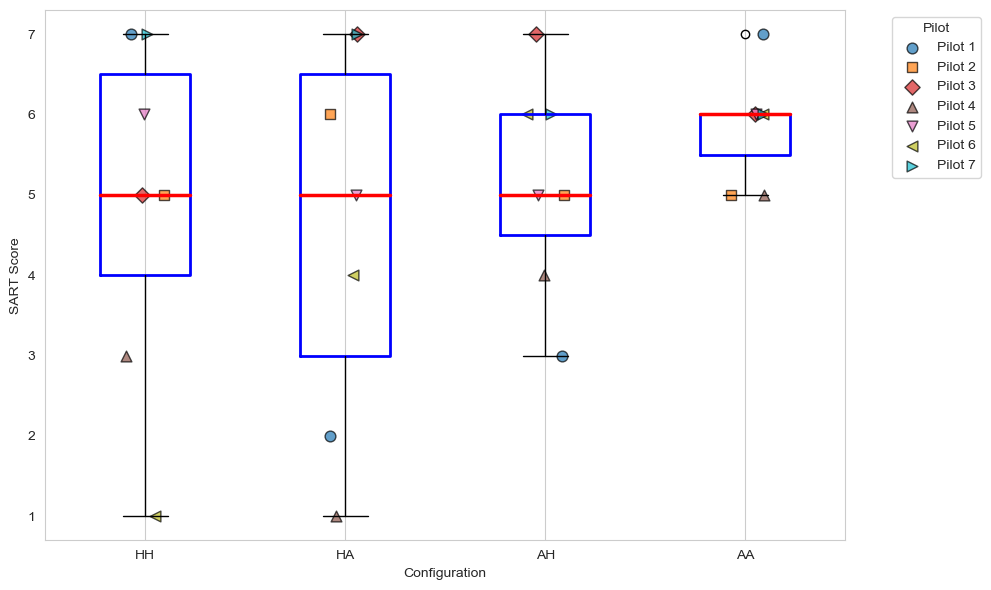

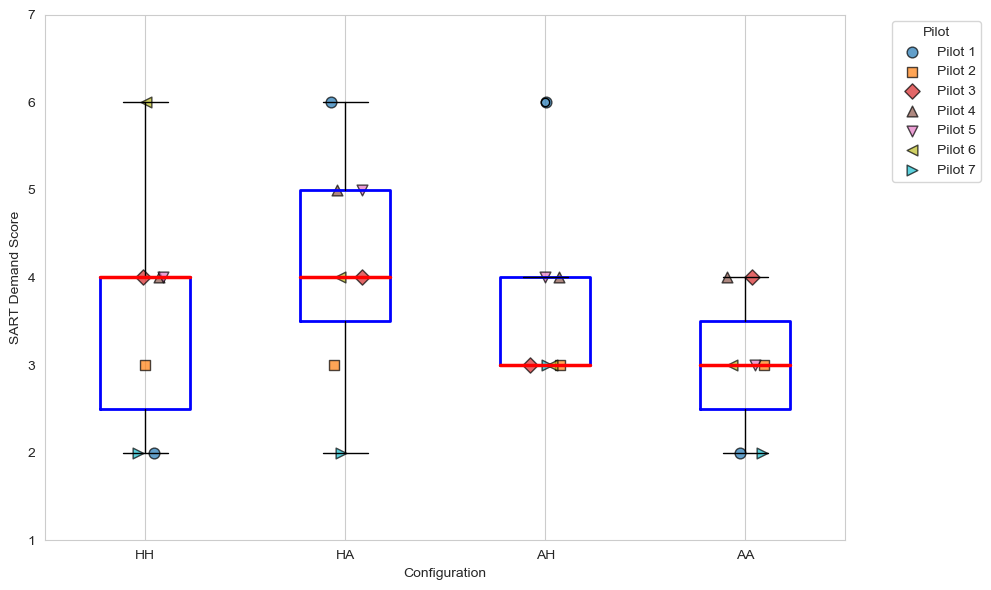

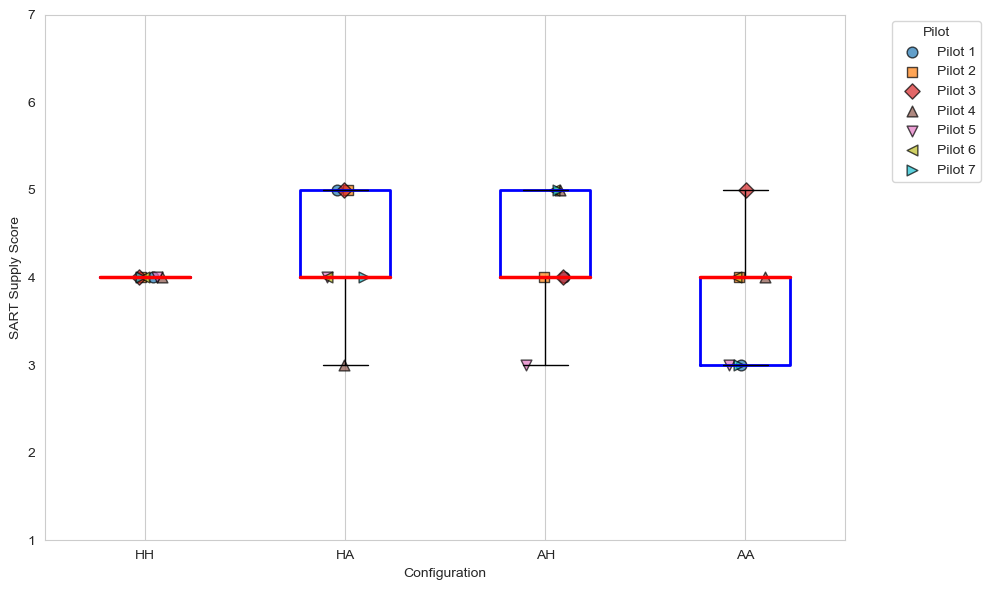

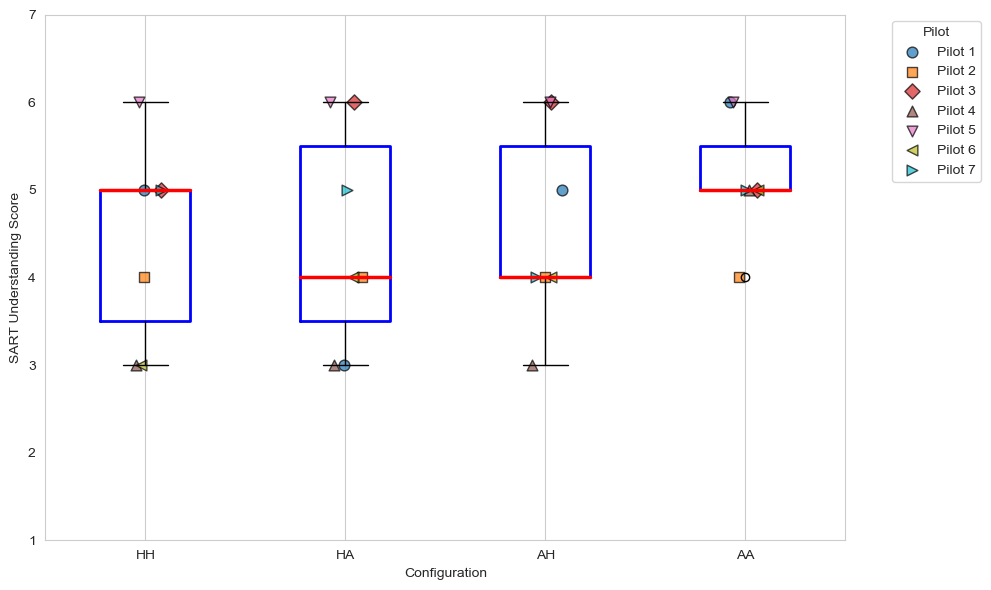

In [77]:
plot_sart_metric(sart_df, sart_col, pilot_styles)
plot_sart_metric(sart_df, demand_col, pilot_styles)
plot_sart_metric(sart_df, supply_col, pilot_styles)
plot_sart_metric(sart_df, understanding_col, pilot_styles)

## Trust

In [78]:
consolidated_df = pd.read_excel('Consolidated Data Collection Sheet.xlsx', sheet_name='SART')

In [79]:
# remove the first row from the dataframe
consolidated_df = consolidated_df.iloc[1:]
trust_df = consolidated_df[['Name', 'Test Point', 'Configuration', f'Trust (0-100%)']]

In [80]:
trust_df['Lead_Pilot'] = trust_df['Name'].replace({'Chuck': 'Pilot 1', 'Indy': 'Pilot 2', 'Tars': 'Pilot 3', 'MACH': 'Pilot 4', 'Savage': 'Pilot 5', 'Pig': 'Pilot 6', 'Assassin': 'Pilot 7', 'Mach': 'Pilot 4'})

/var/folders/6k/39pgnfs54wn25kbnd913q5wr0000gn/T/ipykernel_32876/4218675892.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trust_df['Lead_Pilot'] = trust_df['Name'].replace({'Chuck': 'Pilot 1', 'Indy': 'Pilot 2', 'Tars': 'Pilot 3', 'MACH': 'Pilot 4', 'Savage': 'Pilot 5', 'Pig': 'Pilot 6', 'Assassin': 'Pilot 7', 'Mach': 'Pilot 4'})


In [81]:
trust_df = trust_df.drop_duplicates(subset=['Lead_Pilot', 'Test Point', 'Configuration'])

In [84]:
trust_df_c = trust_df[trust_df['Test Point']=='C']
trust_df_d = trust_df[trust_df['Test Point']=='D']

In [89]:
# define a function that plots trust using the same scheme and pilot styles as before
def plot_trust_metric(df, scenario, pilot_styles):
    col = f'Trust (0-100%)'
    configs = ['HH', 'HA', 'AH', 'AA'] if scenario == 'C' else ['HA', 'AA']
    plt.figure(figsize=(10, 6))

    # --- Boxplot data ---
    data_for_box = []
    valid_configs = []
    for c in configs:
        subset = df.loc[df['Configuration'] == c, col].dropna()
        if len(subset) > 0:
            data_for_box.append(subset)
            valid_configs.append(c)

    if not valid_configs:
        print(f"⚠️ No valid data found for {col} (Scenario {scenario}). Skipping plot.")
        return

    boxprops = dict(linestyle='-', linewidth=2, color='blue')
    medianprops = dict(linestyle='-', linewidth=2.5, color='red')
    plt.boxplot(data_for_box, labels=valid_configs,
                boxprops=boxprops, medianprops=medianprops)

    # --- Overlay raw data with consistent pilot colors/markers ---
    for i, config in enumerate(valid_configs, start=1):
        subset = df[df['Configuration'] == config].dropna(subset=[col])
        for pilot, pilot_df in subset.groupby('Lead_Pilot'):
            if pilot not in pilot_styles:
                continue
            style = pilot_styles[pilot]
            jitter = np.random.uniform(-0.1, 0.1, size=len(pilot_df))
            plt.scatter(
                np.full(len(pilot_df), i) + jitter,
                pilot_df[col],
                alpha=0.7,
                s=60,
                marker=style['marker'],
                color=style['color'],
                edgecolor='black',
                label=pilot if i == 1 else None
            )

    # --- Titles, labels, legend ---
    # plt.title(f'Scenario {scenario}\nTrust (%) by Configuration',
    #           fontsize=14, pad=10)
    plt.ylabel('Trust (%)')
    plt.xlabel('Configuration')
    plt.ylim(0, 105)
    plt.grid(axis='y')

    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(),
               title='Pilot', bbox_to_anchor=(1.05, 1 ), loc='upper left')
    plt.tight_layout()
    # --- Save plot ---
    # plt.show()
    plt.savefig(f'Trust/Plots NOTITLES/Trust_Scenario_{scenario}.jpg', dpi=700)
    plt.close()

In [90]:
plot_trust_metric(trust_df_c, 'C', pilot_styles)

In [91]:
plot_trust_metric(trust_df_d, 'D', pilot_styles)